In [18]:
# Show plots inline, and load main getdist plot module and samples class
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
import sys, os
path = os.getcwd()
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
%matplotlib inline

GetDist Version: 1.4.3, Matplotlib version: 3.7.1


In [19]:
# Define getdist-subplotter
analysis_settings = {'ignore_rows': '0.3'}
g = plots.get_subplot_plotter(analysis_settings=analysis_settings)

# Get MCMC-samples
samples1 = g.samples_for_root(path+'/chains/BAO_DESI_Bin1+BBN_wcdm')
samples2 = g.samples_for_root(path+'/chains/BAO_DESI_Bin2+BBN_wcdm')
samples3 = g.samples_for_root(path+'/chains/BAO_DESI_Bin3+BBN_wcdm')
samples4 = g.samples_for_root(path+'/chains/BAO_DESI+BBN_wcdm')

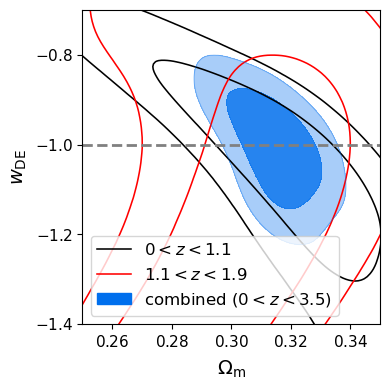

In [20]:
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([samples1, samples2, samples4], 'omegam', 'w', filled=[False, False, True],
          lims=[0.25, 0.35, -1.4, -0.7])
g.add_legend(['$0<z<1.1$', '$1.1<z<1.9$', 'combined ($0<z<$3.5)'], legend_loc='lower left');
g.add_y_marker(-1, lw=2)

In [1]:
from numpy.linalg import inv
from statsmodels.stats.moment_helpers import cov2corr
import numpy as np
def plot_cov(matrix):
    ''' Plot the correlation matrix derived from the covariance matrix '''
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.imshow(cov2corr(matrix),vmin=-1, vmax=1,cmap='seismic')
    print("correlation matrix:", cov2corr(matrix))
    plt.colorbar()
    plt.show()

In [5]:
margestats = samples4.getMargeStats()
p=samples4.getParams()

####################################################################### SUBSECTION: wp ESTIMATION 
covmat_w0wa = samples4.cov(pars=['w', 'wa'])
ap = 1 + covmat_w0wa[0,1]/covmat_w0wa[1,1]

# get samples for wp
samples4.addDerived(p.w+p.wa*(1-ap), name='wp', label='w_p')

# plot contours and covariance for w0-wa
g.new_plot()
g.plot_2d(samples4, 'w', 'wa', filled=True);
plot_cov(covmat_w0wa)

# plot contours and covariance for wp-wa
g.new_plot()
g.plot_2d(samples4, 'wp', 'wa', filled=True);
cov_new = samples4.cov(pars=['wp', 'wa'])
plot_cov(cov_new)


ParamError: Unknown parameter wa